## Revision History

Update with your details here

Name : Sairam Reddy Maddireddy

Date : 12-03-2021

## Basic problem statement 
Explore, understand and build on what factors influence energy consumption – for appliance and light

## Data Set Information

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column.

## Attribute Information
* date : time year-month-day hour:minute:second
* Appliances, energy use in Wh 
* lights, energy use of light fixtures in the house in Wh 
* T1, Temperature in kitchen area, in Celsius 
* RH_1, Humidity in kitchen area, in % 
* T2, Temperature in living room area, in Celsius 
* RH_2, Humidity in living room area, in % 
* T3, Temperature in laundry room area 
* RH_3, Humidity in laundry room area, in % 
* T4, Temperature in office room, in Celsius 
* RH_4, Humidity in office room, in % 
* T5, Temperature in bathroom, in Celsius 
* RH_5, Humidity in bathroom, in % 
* T6, Temperature outside the building (north side), in Celsius 
* RH_6, Humidity outside the building (north side), in % 
* T7, Temperature in ironing room , in Celsius 
* RH_7, Humidity in ironing room, in % 
* T8, Temperature in teenager room 2, in Celsius 
* RH_8, Humidity in teenager room 2, in % 
* T9, Temperature in parents room, in Celsius 
* RH_9, Humidity in parents room, in % 
* To, Temperature outside (from Chievres weather station), in Celsius 
* Pressure (from Chievres weather station), in mm Hg 
* RH_out, Humidity outside (from Chievres weather station), in % 
* Wind speed (from Chievres weather station), in m/s 
* Visibility (from Chievres weather station), in km 
* Tdewpoint (from Chievres weather station), in Deg C

In [1]:
import sys
sys.path.append("C:/Users/Administrator/AppData/Local/conda/conda/envs/tf2/Lib/site-packages")
import xgboost

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(precision=6, suppress=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
from sklearn.preprocessing import StandardScaler

## Read data and basic data clean-up

In [3]:
df=pd.read_csv('energydata_complete.csv')

In [4]:
df.shape

(19735, 29)

In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.8900,47.5967,19.2000,44.7900,19.7900,44.7300,19.0000,45.5667,17.1667,55.2000,7.0267,84.2567,17.2000,41.6267,18.2000,48.9000,17.0333,45.5300,6.6000,733.5000,92.0000,7.0000,63.0000,5.3000,13.2754,13.2754
1,2016-01-11 17:10:00,60,30,19.8900,46.6933,19.2000,44.7225,19.7900,44.7900,19.0000,45.9925,17.1667,55.2000,6.8333,84.0633,17.2000,41.5600,18.2000,48.8633,17.0667,45.5600,6.4833,733.6000,92.0000,6.6667,59.1667,5.2000,18.6062,18.6062
2,2016-01-11 17:20:00,50,30,19.8900,46.3000,19.2000,44.6267,19.7900,44.9333,18.9267,45.8900,17.1667,55.0900,6.5600,83.1567,17.2000,41.4333,18.2000,48.7300,17.0000,45.5000,6.3667,733.7000,92.0000,6.3333,55.3333,5.1000,28.6427,28.6427
3,2016-01-11 17:30:00,50,40,19.8900,46.0667,19.2000,44.5900,19.7900,45.0000,18.8900,45.7233,17.1667,55.0900,6.4333,83.4233,17.1333,41.2900,18.1000,48.5900,17.0000,45.4000,6.2500,733.8000,92.0000,6.0000,51.5000,5.0000,45.4104,45.4104
4,2016-01-11 17:40:00,60,40,19.8900,46.3333,19.2000,44.5300,19.7900,45.0000,18.8900,45.5300,17.2000,55.0900,6.3667,84.8933,17.2000,41.2300,18.1000,48.5900,17.0000,45.4000,6.1333,733.9000,92.0000,5.6667,47.6667,4.9000,10.0841,10.0841


In [6]:
#checking for unique rows
df.shape

(19735, 29)

In [7]:
df.date.nunique()

19735

In [8]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000
mean,97.6950,3.8019,21.6866,40.2597,20.3412,40.4204,22.2676,39.2425,20.8553,39.0269,19.5921,50.9493,7.9109,54.6091,20.2671,35.3882,22.0291,42.9362,19.4858,41.5524,7.4117,755.5226,79.7504,4.0398,38.3308,3.7607,24.9880,24.9880
std,102.5249,7.9360,1.6061,3.9793,2.1930,4.0698,2.0061,3.2546,2.0429,4.3413,1.8446,9.0220,6.0903,31.1498,2.1100,5.1142,1.9562,5.2244,2.0147,4.1515,5.3174,7.3994,14.9011,2.4512,11.7947,4.1946,14.4966,14.4966
min,10.0000,0.0000,16.7900,27.0233,16.1000,20.4633,17.2000,28.7667,15.1000,27.6600,15.3300,29.8150,-6.0650,1.0000,15.3900,23.2000,16.3067,29.6000,14.8900,29.1667,-5.0000,729.3000,24.0000,0.0000,1.0000,-6.6000,0.0053,0.0053
25%,50.0000,0.0000,20.7600,37.3333,18.7900,37.9000,20.7900,36.9000,19.5300,35.5300,18.2775,45.4000,3.6267,30.0250,18.7000,31.5000,20.7900,39.0667,18.0000,38.5000,3.6667,750.9333,70.3333,2.0000,29.0000,0.9000,12.4979,12.4979
50%,60.0000,0.0000,21.6000,39.6567,20.0000,40.5000,22.1000,38.5300,20.6667,38.4000,19.3900,49.0900,7.3000,55.2900,20.0333,34.8633,22.1000,42.3750,19.3900,40.9000,6.9167,756.1000,83.6667,3.6667,40.0000,3.4333,24.8977,24.8977
75%,100.0000,0.0000,22.6000,43.0667,21.5000,43.2600,23.2900,41.7600,22.1000,42.1567,20.6196,53.6633,11.2560,83.2267,21.6000,39.0000,23.3900,46.5360,20.6000,44.3381,10.4083,760.9333,91.6667,5.5000,40.0000,6.5667,37.5838,37.5838
max,1080.0000,70.0000,26.2600,63.3600,29.8567,56.0267,29.2360,50.1633,26.2000,51.0900,25.7950,96.3217,28.2900,99.9000,26.0000,51.4000,27.2300,58.7800,24.5000,53.3267,26.1000,772.3000,100.0000,14.0000,66.0000,15.5000,49.9965,49.9965


### Feature Engineering


In [9]:
df['date']=pd.to_datetime(df.date)
df['only_date']=df.date.dt.date
df['year']=df.date.dt.year
df['month']=df.date.dt.month
df['day']=df.date.dt.day
df['hour']=df.date.dt.hour
df['minute']=df.date.dt.minute
df['dayname']=df.date.dt.day_name()
df[['date','year','month','day','hour','minute','dayname']].tail()

,date,year,month,day,hour,minute,dayname
19730,2016-05-27 17:20:00,2016,5,27,17,20,Friday
19731,2016-05-27 17:30:00,2016,5,27,17,30,Friday
19732,2016-05-27 17:40:00,2016,5,27,17,40,Friday
19733,2016-05-27 17:50:00,2016,5,27,17,50,Friday
19734,2016-05-27 18:00:00,2016,5,27,18,0,Friday


In [10]:
def getdaytype(x):
    if (x>=20 and x<=23) or (x>=0 and x<6):
        return 'Night'
    elif x>=6 and x<11:
        return 'Morning'
    elif x>=11 and x<16:
        return 'Afternoon'
    elif x>=16 and x<20:
        return 'Evening'

In [11]:
df['daytype']=df.hour.apply(getdaytype)

In [12]:
active_hours=[6,7,8,9,10,17,18,19,20,21]
df['IsActiveHour']=df.hour.isin(active_hours)

In [13]:
df['total_consumption']=df['Appliances']+df['lights']

In [14]:
df['consumption_in_kw']=df['Appliances']/1000

#### Feature Crosses

In [15]:
df['kitchen_room_val']=df.T1*df.RH_1
df['living_room_val']=df.T2*df.RH_2
df['laundry_room_val']=df.T3*df.RH_3
df['office_room_val']=df.T4*df.RH_4
df['bath_room_val']=df.T5*df.RH_5
df['outside_val']=df.T6*df.RH_6
df['ironing_room_val']=df.T7*df.RH_7
df['teenager_room_val']=df.T8*df.RH_8
df['parents_room_val']=df.T9*df.RH_9
df['external_source_val']=df['T_out']*df.Press_mm_hg*df.RH_out*df.Windspeed*df.Visibility*df.Tdewpoint

In [16]:
temp_cols=['T'+str(i) for i in range(1,10)]
hum_cols=['RH_'+str(i) for i in range(1,10)]
df['mean_temp_home']=df[temp_cols].mean(axis=1)
df['mean_hum_home']=df[hum_cols].mean(axis=1)

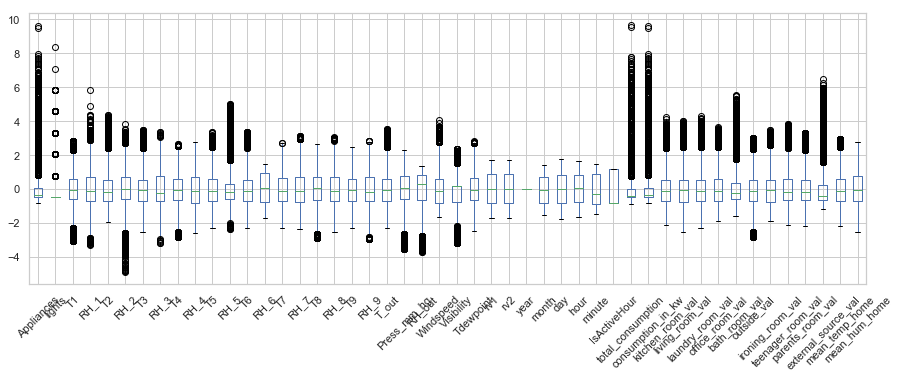

In [17]:
scalar=StandardScaler()
a_df=df.drop(['date','only_date','dayname','daytype'],axis=1)
tf_df=scalar.fit_transform(a_df)
tf_df=pd.DataFrame(tf_df,columns=a_df.columns)
plt.figure(figsize=(15,5))
tf_df.boxplot(rot=45)

plt.show()

In [18]:
ap_df=a_df[a_df.Appliances>=200]

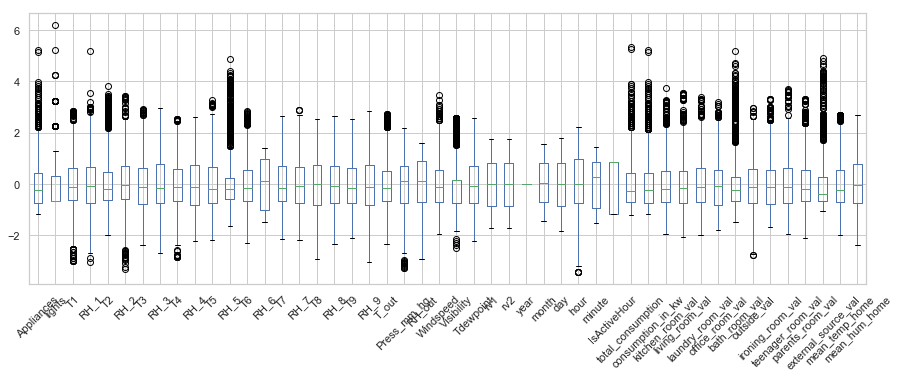

In [19]:
scalar=StandardScaler()
tf_df=scalar.fit_transform(ap_df)
tf_df=pd.DataFrame(tf_df,columns=ap_df.columns)
plt.figure(figsize=(15,5))
tf_df.boxplot(rot=45)

plt.show()

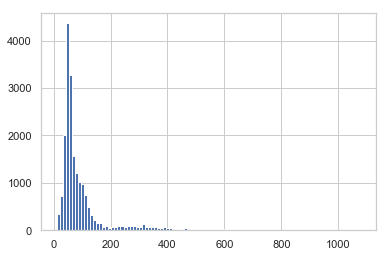

In [20]:
#Checking application consumption distribution
df.Appliances.hist(bins=100)

##### There are outliers in Applications feature >200, couldn't find exact reasons

#### Checking distribution of lights feature

In [21]:
df['lights'].value_counts()*100/df.shape[0]

0    77.2840
10   11.2085
20    8.2290
30    2.8325
40    0.3902
50    0.0456
60    0.0051
70    0.0051
Name: lights, dtype: float64

In [22]:
def q1(x):
    return x.quantile(.90)
def pzero(x):
    return np.sum(x==0)*100/x.shape[0]

In [23]:
df.groupby(['hour']).agg({'lights':['mean','max','min',q1,pzero]})

lights                    
       mean max min  q1   pzero
hour                           
0    3.1873  30   0  20 82.2384
1    1.3017  30   0   0 91.7275
2    0.4258  20   0   0 96.3504
3    0.3041  20   0   0 97.0803
4    0.2068  20   0   0 98.0535
5    0.6448  20   0   0 93.9173
6    1.0827  30   0   0 90.5109
7    3.4672  40   0  10 76.0341
8    4.2944  50   0  20 74.2092
9    4.5377  40   0  20 72.7494
10   4.7080  40   0  20 72.3844
11   3.5766  40   0  10 76.2774
12   3.2117  40   0  10 80.2920
13   2.8345  30   0  10 80.7786
14   2.8710  40   0  10 82.1168
15   2.4696  30   0  10 83.3333
16   2.7737  30   0  10 82.6034
17   4.5894  50   0  20 72.8261
18   7.3998  70   0  20 58.4447
19   7.3601  50   0  20 54.2579
20   9.5377  40   0  30 51.4599
21   7.8102  40   0  20 55.9611
22   7.1655  30   0  20 60.3406
23   5.4745  50   0  20 70.9246

### More zeros in lights feature doesn't mean the data loss. Energy is only consumed whey are on. So its only active in evenings and  in nights

In [24]:
#Checking lights feature values for outliers in Applications feature
df[df.Appliances>200]['lights'].value_counts()*100/df[df.Appliances>200].shape[0]

0    60.5950
10   19.0501
20   13.3090
30    5.4802
40    1.3048
50    0.1566
70    0.0522
60    0.0522
Name: lights, dtype: float64

In [25]:
#Checking for negative values in each columna

for i in a_df.columns[1:-1]:
    c=np.sum(df[i]<0)
    if c>0:
        print(i,':',np.sum(df[i]<0))

T6 : 1360
T_out : 1154
Tdewpoint : 3237
outside_val : 1360
external_source_val : 2057


###### Seems like negative values in above features are legitimate i.e  temparature can be negatives

## Perform analysis & model development 

#### EDA

In [26]:
#Average daily consumption
df['Appliances'].mean()

97.6949581960983

In [27]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,only_date,year,month,day,hour,minute,dayname,daytype,IsActiveHour,total_consumption,consumption_in_kw,kitchen_room_val,living_room_val,laundry_room_val,office_room_val,bath_room_val,outside_val,ironing_room_val,teenager_room_val,parents_room_val,external_source_val,mean_temp_home,mean_hum_home
0,2016-01-11 17:00:00,60,30,19.8900,47.5967,19.2000,44.7900,19.7900,44.7300,19.0000,45.5667,17.1667,55.2000,7.0267,84.2567,17.2000,41.6267,18.2000,48.9000,17.0333,45.5300,6.6000,733.5000,92.0000,7.0000,63.0000,5.3000,13.2754,13.2754,2016-01-11,2016,1,11,17,0,Monday,Evening,True,90,0.0600,946.6977,859.9680,885.2067,865.7667,947.6000,592.0435,715.9787,889.9800,775.5277,1040989478.7600,17.1674,50.9107
1,2016-01-11 17:10:00,60,30,19.8900,46.6933,19.2000,44.7225,19.7900,44.7900,19.0000,45.9925,17.1667,55.2000,6.8333,84.0633,17.2000,41.5600,18.2000,48.8633,17.0667,45.5600,6.4833,733.6000,92.0000,6.6667,59.1667,5.2000,18.6062,18.6062,2016-01-11,2016,1,11,17,10,Monday,Evening,True,90,0.0600,928.7304,858.6720,886.3941,873.8575,947.6000,574.4328,714.8320,889.3127,777.5573,897500477.2741,17.1496,50.8272
2,2016-01-11 17:20:00,50,30,19.8900,46.3000,19.2000,44.6267,19.7900,44.9333,18.9267,45.8900,17.1667,55.0900,6.5600,83.1567,17.2000,41.4333,18.2000,48.7300,17.0000,45.5000,6.3667,733.7000,92.0000,6.3333,55.3333,5.1000,28.6427,28.6427,2016-01-11,2016,1,11,17,20,Monday,Evening,True,80,0.0500,920.9070,856.8320,889.2307,868.5447,945.7117,545.5077,712.6533,886.8860,773.5000,768082401.5724,17.1037,50.6289
3,2016-01-11 17:30:00,50,40,19.8900,46.0667,19.2000,44.5900,19.7900,45.0000,18.8900,45.7233,17.1667,55.0900,6.4333,83.4233,17.1333,41.2900,18.1000,48.5900,17.0000,45.4000,6.2500,733.8000,92.0000,6.0000,51.5000,5.0000,45.4104,45.4104,2016-01-11,2016,1,11,17,30,Monday,Evening,True,90,0.0500,916.2660,856.1280,890.5500,863.7138,945.7117,536.6901,707.4353,879.4790,771.8000,651889575.0000,17.0670,50.5748
4,2016-01-11 17:40:00,60,40,19.8900,46.3333,19.2000,44.5300,19.7900,45.0000,18.8900,45.5300,17.2000,55.0900,6.3667,84.8933,17.2000,41.2300,18.1000,48.5900,17.0000,45.4000,6.1333,733.9000,92.0000,5.6667,47.6667,4.9000,10.0841,10.0841,2016-01-11,2016,1,11,17,40,Monday,Evening,True,100,0.0600,921.5700,854.9760,890.5500,860.0617,947.5480,540.4876,709.1560,879.4790,771.8000,548100013.4981,17.0707,50.7330


In [28]:
def type1Plots(df,groupby_col='month'):
    #Monthly sum and average
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

    t1=df.groupby(groupby_col,as_index=False)['consumption_in_kw'].sum()#.plot(kind='line',ax=axes[0])
    t2=df.groupby([groupby_col,'only_date'],as_index=False)['consumption_in_kw'].sum().groupby(groupby_col,as_index=False)['consumption_in_kw'].mean()#.plot(kind='line',ax=axes[1])

    sns.lineplot(data=t1, x=groupby_col, y="consumption_in_kw",ax=axes[0])
    sns.lineplot(data=t2, x=groupby_col, y="consumption_in_kw",ax=axes[1])

    #axes[0].set_xticks(range(1,6))
    #"axes[1].set_xticks(range(1,6))
    plt.show()

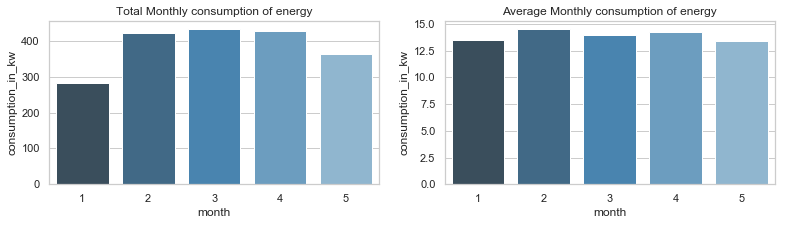

In [29]:
#type1Plots(df,'month')
groupby_col='month'
#Monthly sum and average
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(13,3))

t1=df.groupby(groupby_col,as_index=False)['consumption_in_kw'].sum()#.plot(kind='line',ax=axes[0])
t2=df.groupby([groupby_col,'only_date'],as_index=False)['consumption_in_kw'].sum().groupby(groupby_col,as_index=False)['consumption_in_kw'].mean()#.plot(kind='line',ax=axes[1])

#sns.lineplot(data=t1, x=groupby_col, y="consumption_in_kw",ax=axes[0])
sns.barplot(data=t1, x=groupby_col, y="consumption_in_kw",ax=axes[0],palette="Blues_d")
#sns.lineplot(data=t2, x=groupby_col, y="consumption_in_kw",ax=axes[1])
sns.barplot(data=t2, x=groupby_col, y="consumption_in_kw",ax=axes[1],palette="Blues_d")

#axes[0].set_xticks(range(1,6))
#axes[1].set_xticks(range(1,6))
axes[0].set_title('Total Monthly consumption of energy')
axes[1].set_title('Average Monthly consumption of energy')
plt.show()

##### Lower consumption in first month and last month is obvious like we have date for only half of the month

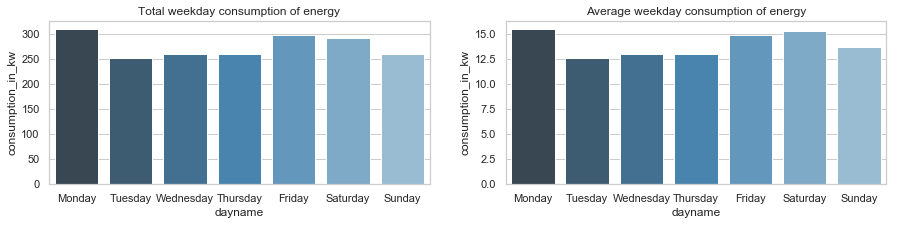

In [30]:

groupby_col='dayname'
sort_cols=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#Monthly sum and average
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,3))

t1=df.groupby(groupby_col,as_index=False)['consumption_in_kw'].sum()#.plot(kind='line',ax=axes[0])
t1['dayname']=pd.Categorical(t1['dayname'], categories=sort_cols, ordered=True)
t2=df.groupby([groupby_col,'only_date'],as_index=False)['consumption_in_kw'].sum().groupby(groupby_col,as_index=False)['consumption_in_kw'].mean()#.plot(kind='line',ax=axes[1])
t2['dayname']=pd.Categorical(t2['dayname'], categories=sort_cols, ordered=True)

sns.barplot(data=t1.sort_values(by=groupby_col), x=groupby_col, y="consumption_in_kw",ax=axes[0],palette="Blues_d")
sns.barplot(data=t2, x=groupby_col, y="consumption_in_kw",ax=axes[1],palette="Blues_d")

#axes[0].set_xticks(range(1,6))
#axes[1].set_xticks(range(1,6))
axes[0].set_title('Total weekday consumption of energy')
axes[1].set_title('Average weekday consumption of energy')
plt.show()

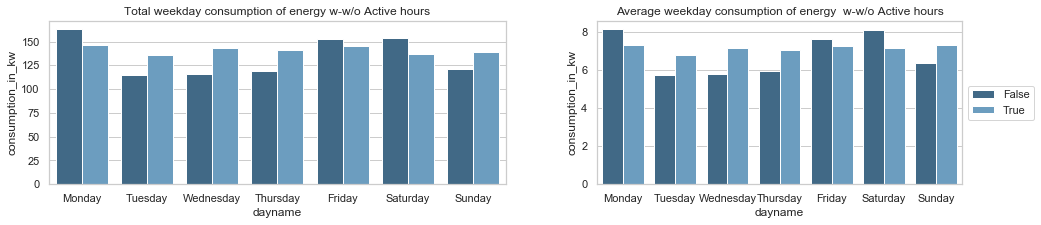

In [31]:

groupby_col='dayname'
sort_cols=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#Monthly sum and average
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18,3))

t1=df.groupby([groupby_col,'IsActiveHour'],as_index=False)['consumption_in_kw'].sum()#.plot(kind='line',ax=axes[0])
t1['dayname']=pd.Categorical(t1['dayname'], categories=sort_cols, ordered=True)
t2=df.groupby([groupby_col,'IsActiveHour','only_date'],as_index=False)['consumption_in_kw'].sum().groupby([groupby_col,'IsActiveHour'],as_index=False)['consumption_in_kw'].mean()#.plot(kind='line',ax=axes[1])
t2['dayname']=pd.Categorical(t2['dayname'], categories=sort_cols, ordered=True)

sns.barplot(data=t1.sort_values(by=groupby_col),hue='IsActiveHour', x=groupby_col, y="consumption_in_kw",ax=axes[0],palette="Blues_d")
sns.barplot(data=t2, x=groupby_col,hue='IsActiveHour', y="consumption_in_kw",ax=axes[1],palette="Blues_d")

#axes[0].set_xticks(range(1,6))
#axes[1].set_xticks(range(1,6))
# Shrink current axis by 20%

axes[0].get_legend().remove()
box = axes[1].get_position()

axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[0].set_title('Total weekday consumption of energy w-w/o Active hours')
axes[1].set_title('Average weekday consumption of energy  w-w/o Active hours')
plt.show()

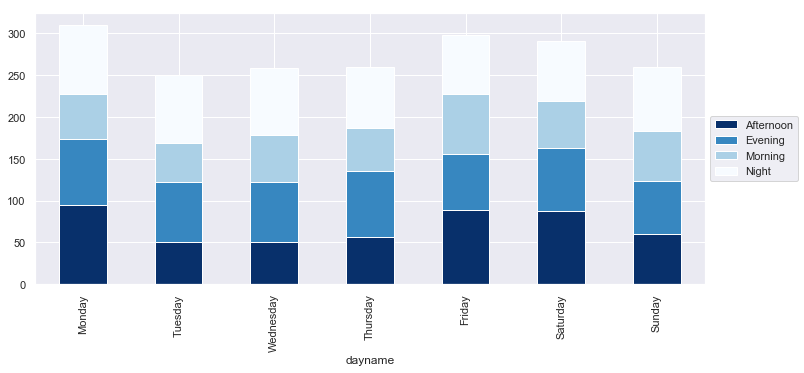

In [32]:
groupby_col='dayname'

t1=df.groupby([groupby_col,'daytype'])['consumption_in_kw'].sum().unstack(1).reset_index()
t2=df.groupby([groupby_col,'daytype'],as_index=False)['consumption_in_kw'].sum()
t1['dayname']=pd.Categorical(t1['dayname'], categories=sort_cols)
t1=t1.sort_values(by=groupby_col).set_index('dayname')

sns.set_style("darkgrid")
ax=t1[['Afternoon','Evening','Morning','Night']].plot(kind='bar', stacked=True,colormap='Blues_r',figsize=(15,5))
box = ax.get_position()

ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

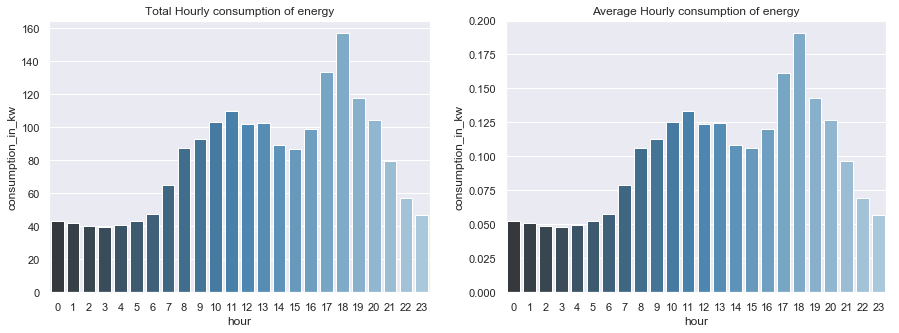

In [33]:

groupby_col='hour'
#Monthly sum and average
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

t1=df.groupby(groupby_col,as_index=False)['consumption_in_kw'].sum()#.plot(kind='line',ax=axes[0])
t2=df.groupby([groupby_col],as_index=False)['consumption_in_kw'].mean()

sns.barplot(data=t1, x=groupby_col, y="consumption_in_kw",ax=axes[0],palette="Blues_d")
sns.barplot(data=t2, x=groupby_col, y="consumption_in_kw",ax=axes[1],palette="Blues_d")

axes[0].set_xticks(range(0,24))
axes[1].set_xticks(range(0,24))
axes[0].set_title('Total Hourly consumption of energy')
axes[1].set_title('Average Hourly consumption of energy')
plt.show()

##### Goes well with general intuition..
less power consumption in the mid nights.
more power consumption in the evening(say when they are back from work).
average consumption in non active hours (10-14)(say when they are in work).

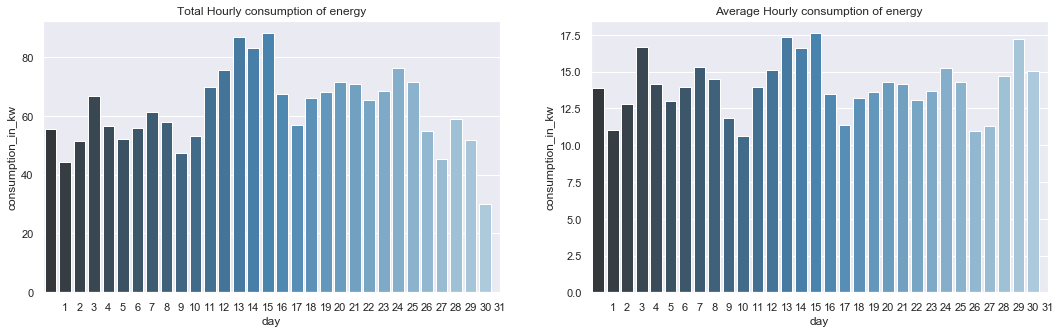

In [34]:

groupby_col='day'
#Monthly sum and average
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18,5))

t1=df.groupby(groupby_col,as_index=False)['consumption_in_kw'].sum()#.plot(kind='line',ax=axes[0])
t2=df.groupby([groupby_col,'only_date'],as_index=False)['consumption_in_kw'].sum().groupby(groupby_col,as_index=False)['consumption_in_kw'].mean()#.plot(kind='line',ax=axes[1])

sns.barplot(data=t1, x=groupby_col, y="consumption_in_kw",ax=axes[0],palette="Blues_d")
sns.barplot(data=t2, x=groupby_col, y="consumption_in_kw",ax=axes[1],palette="Blues_d")

axes[0].set_xticks(range(1,32))
axes[1].set_xticks(range(1,32))
axes[0].set_title('Total Hourly consumption of energy')
axes[1].set_title('Average Hourly consumption of energy')
plt.show()

In [35]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,only_date,year,month,day,hour,minute,dayname,daytype,IsActiveHour,total_consumption,consumption_in_kw,kitchen_room_val,living_room_val,laundry_room_val,office_room_val,bath_room_val,outside_val,ironing_room_val,teenager_room_val,parents_room_val,external_source_val,mean_temp_home,mean_hum_home
0,2016-01-11 17:00:00,60,30,19.8900,47.5967,19.2000,44.7900,19.7900,44.7300,19.0000,45.5667,17.1667,55.2000,7.0267,84.2567,17.2000,41.6267,18.2000,48.9000,17.0333,45.5300,6.6000,733.5000,92.0000,7.0000,63.0000,5.3000,13.2754,13.2754,2016-01-11,2016,1,11,17,0,Monday,Evening,True,90,0.0600,946.6977,859.9680,885.2067,865.7667,947.6000,592.0435,715.9787,889.9800,775.5277,1040989478.7600,17.1674,50.9107
1,2016-01-11 17:10:00,60,30,19.8900,46.6933,19.2000,44.7225,19.7900,44.7900,19.0000,45.9925,17.1667,55.2000,6.8333,84.0633,17.2000,41.5600,18.2000,48.8633,17.0667,45.5600,6.4833,733.6000,92.0000,6.6667,59.1667,5.2000,18.6062,18.6062,2016-01-11,2016,1,11,17,10,Monday,Evening,True,90,0.0600,928.7304,858.6720,886.3941,873.8575,947.6000,574.4328,714.8320,889.3127,777.5573,897500477.2741,17.1496,50.8272
2,2016-01-11 17:20:00,50,30,19.8900,46.3000,19.2000,44.6267,19.7900,44.9333,18.9267,45.8900,17.1667,55.0900,6.5600,83.1567,17.2000,41.4333,18.2000,48.7300,17.0000,45.5000,6.3667,733.7000,92.0000,6.3333,55.3333,5.1000,28.6427,28.6427,2016-01-11,2016,1,11,17,20,Monday,Evening,True,80,0.0500,920.9070,856.8320,889.2307,868.5447,945.7117,545.5077,712.6533,886.8860,773.5000,768082401.5724,17.1037,50.6289
3,2016-01-11 17:30:00,50,40,19.8900,46.0667,19.2000,44.5900,19.7900,45.0000,18.8900,45.7233,17.1667,55.0900,6.4333,83.4233,17.1333,41.2900,18.1000,48.5900,17.0000,45.4000,6.2500,733.8000,92.0000,6.0000,51.5000,5.0000,45.4104,45.4104,2016-01-11,2016,1,11,17,30,Monday,Evening,True,90,0.0500,916.2660,856.1280,890.5500,863.7138,945.7117,536.6901,707.4353,879.4790,771.8000,651889575.0000,17.0670,50.5748
4,2016-01-11 17:40:00,60,40,19.8900,46.3333,19.2000,44.5300,19.7900,45.0000,18.8900,45.5300,17.2000,55.0900,6.3667,84.8933,17.2000,41.2300,18.1000,48.5900,17.0000,45.4000,6.1333,733.9000,92.0000,5.6667,47.6667,4.9000,10.0841,10.0841,2016-01-11,2016,1,11,17,40,Monday,Evening,True,100,0.0600,921.5700,854.9760,890.5500,860.0617,947.5480,540.4876,709.1560,879.4790,771.8000,548100013.4981,17.0707,50.7330


In [38]:
debug_cols=['date', 'only_date', 'dayname', 'daytype','lights','year','month','day','dayname','daytype','total_consumption','consumption_in_kw']

In [39]:
corr = df.drop(debug_cols, axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

##### Few highly correlted features

In [40]:
corr[['T3','T5','T7','T9','T_out']].style.background_gradient(cmap='coolwarm')

,T3,T5,T7,T9,T_out
Appliances,0.0850599,0.0197599,0.025801,0.0100103,0.0991547
T1,0.892402,0.885247,0.838705,0.844777,0.682846
RH_1,0.25323,0.205797,0.021397,0.115263,0.340767
T2,0.735245,0.72055,0.66366,0.675535,0.792255
RH_2,0.137319,0.110409,-0.0514218,0.0545444,0.0336742
T3,1,0.888169,0.847374,0.901324,0.699417
RH_3,-0.0112339,-0.0500625,-0.25009,-0.19527,0.118207
T4,0.852778,0.871813,0.877763,0.889439,0.663478
RH_4,0.122737,0.0918119,-0.131204,-0.0445176,0.293289
T5,0.888169,1,0.870624,0.911055,0.651321


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [42]:
dataX=df[df.Appliances<200].drop(debug_cols+['Appliances'],axis=1)

In [43]:
#days=pd.get_dummies(df['dayname'])
#daytype=pd.get_dummies(df['daytype'])
#dataX=pd.concat([dataX,days,daytype],axis=1)

In [44]:
dataY=df[df.Appliances<200]['Appliances']

In [45]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return np.sqrt(mean_error)

In [134]:
def errorClass(row):
    if row<5:
        return '<5%'
    elif row<10:
        return '<10%'
    elif row<20:
        return '<20%'
    elif row<50:
        return '<50%'
    else:
        return '>50%'
elist=['<5%','<10%','<20%','<50%','>50%']


def trainKV(dataX,dataY,model):
    cv = KFold(n_splits=5, random_state=123, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])
    scores=[]

    scalar=StandardScaler().fit(dataX[dataX.columns[:]].values)
    X_tf=scalar.transform(dataX[dataX.columns[:]].values)
    y=dataY.values
    models=[]
    test_data=[]
    y_test=[]
    y_preds=[]
    for (train, test), i in zip(cv.split(X_tf, y), range(5)):
       
        model.fit(X_tf[train], y[train])
        y_pred=model.predict(X_tf[test])
        error=abs(y[test]-y_pred)
        error_mean=np.mean(error)
        #print(y[test])
        #print(y_pred)
        #print(error)
        score_tr=rmse_metric(y[train],model.predict(X_tf[train]))
        score_te=rmse_metric(y[test],y_pred)
        scores.append((score_tr, score_te,error_mean))
        if i==4:
            features = dataX.columns
            importances = model.feature_importances_
            indices = np.argsort(importances)
            plt.figure(figsize=(10,15))
            plt.title('Feature Importances')
            plt.barh(range(len(indices)), importances[indices], color='b', align='center')
            plt.yticks(range(len(indices)), [features[i] for i in indices])
            plt.xlabel('Relative Importance')
            plt.show()
        test_data.append(dataX.iloc[test])
        y_test.append(y[test])
        y_preds.append(y_pred)
    return scores,test_data,y_test,y_preds

### XGBoost

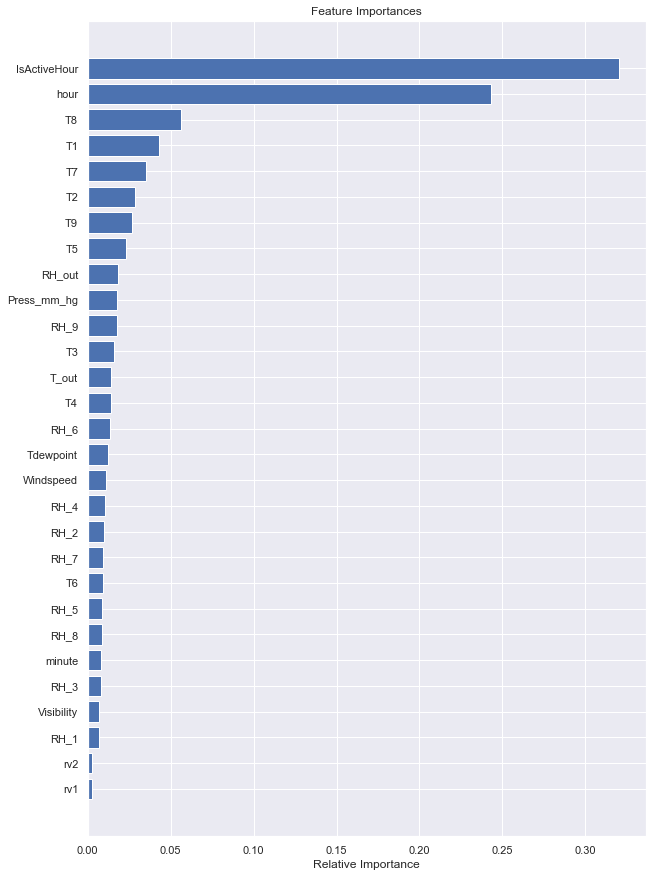

[(21.629769874669112, 23.126928202200855, 15.833750106635444),
 (22.001804340295934, 21.70604837329515, 15.162980853974283),
 (21.837745537059757, 22.434715171783225, 15.432305449838037),
 (21.568258562805347, 23.051770144059077, 15.656540626878137),
 (21.868868120465326, 22.10452533389627, 15.292906278962487)]

In [47]:
trainKV(dataX,dataY,xgboost.XGBRFRegressor())

### Random Forest w/o feature crosses

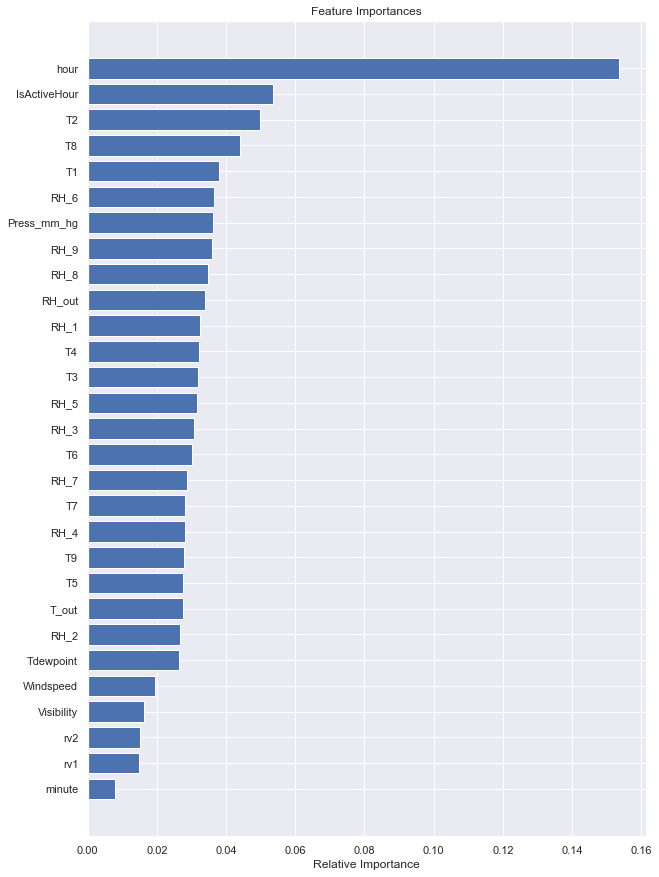

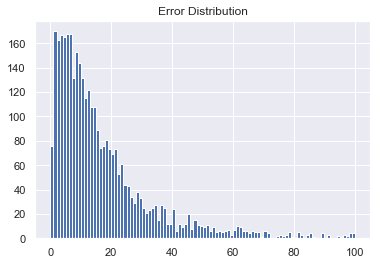

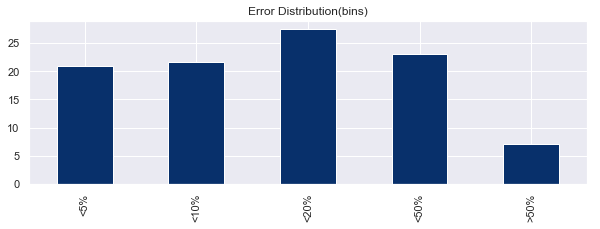

In [154]:
model=RandomForestRegressor(n_estimators=300,max_depth=40,max_features='sqrt',random_state=0)
scores1,test_data1,y_test1,y_preds1=trainKV(dataX[dataX.columns[:-12]],dataY,model)

X_test,y_test,y_pred=test_data1[-1],y_test1[-1],y_preds1[-1]
result_df=pd.DataFrame(X_test,columns=dataX.columns)
result_df['Actual']=y_test
result_df['Predicted']=y_pred
result_df['Error']=abs(y_test-y_pred)
result_df['Error%']=abs(y_test-y_pred)*100/y_test
result_df['Error%']=result_df['Error%'].apply(round)
result_df['ErrorClass']=result_df['Error%'].apply(errorClass)
result_df['Error%'].hist(bins=100,range=(0,100))
plt.title('Error Distribution')
plt.show()
p=result_df.ErrorClass.value_counts()[elist]*100/result_df.shape[0]
p.plot(kind='bar',colormap='Blues_r',figsize=(10,3))
plt.title('Error Distribution(bins)')
plt.show()

#p=result_df.groupby(['ErrorClass','IsActiveHour'],as_index=False)['T1'].count()
#p['perCent']=p['T1']*100/p['T1'].sum()
#sns.barplot(data=p,x='ErrorClass',y='perCent',hue='IsActiveHour')
#plt.show()

### Random Forest w/o feature crosses and hour 

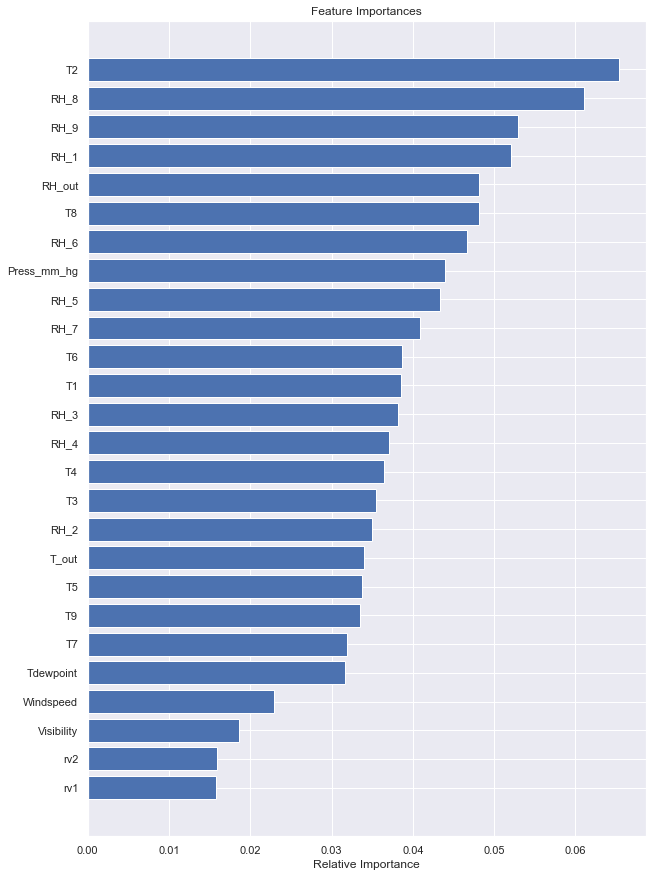

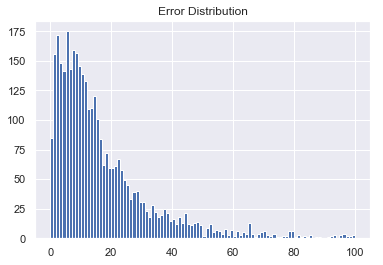

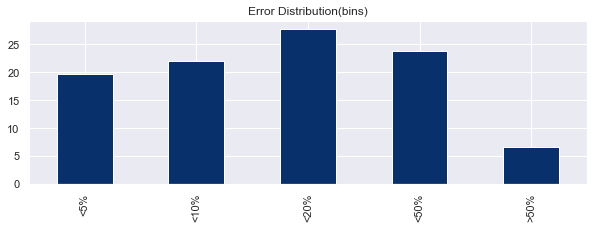

In [155]:
model=RandomForestRegressor(n_estimators=300,max_depth=40,max_features='sqrt',random_state=0)
p=dataX.drop(['hour','IsActiveHour'],axis=1)
p[p.columns[:-13]]
scores2,test_data2,y_test2,y_preds2=trainKV(p[p.columns[:-13]],dataY,model)

X_test,y_test,y_pred=test_data2[-1],y_test2[-1],y_preds2[-1]
result_df=pd.DataFrame(X_test,columns=dataX.columns)
result_df['Actual']=y_test
result_df['Predicted']=y_pred
result_df['Error']=abs(y_test-y_pred)
result_df['Error%']=abs(y_test-y_pred)*100/y_test
result_df['Error%']=result_df['Error%'].apply(round)
result_df['ErrorClass']=result_df['Error%'].apply(errorClass)
result_df['Error%'].hist(bins=100,range=(0,100))
plt.title('Error Distribution')
plt.show()
p=result_df.ErrorClass.value_counts()[elist]*100/result_df.shape[0]
p.plot(kind='bar',colormap='Blues_r',figsize=(10,3))
plt.title('Error Distribution(bins)')
plt.show()

#p=result_df.groupby(['ErrorClass','IsActiveHour'],as_index=False)['T1'].count()
#p['perCent']=p['T1']*100/p['T1'].sum()
#sns.barplot(data=p,x='ErrorClass',y='perCent',hue='IsActiveHour')
#plt.show()

### Random Forest with all features

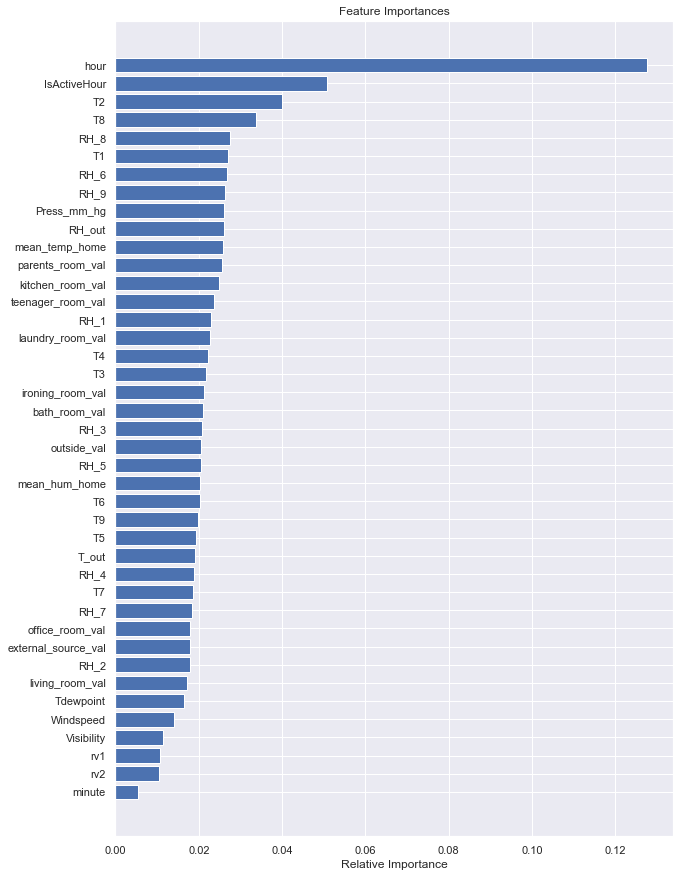

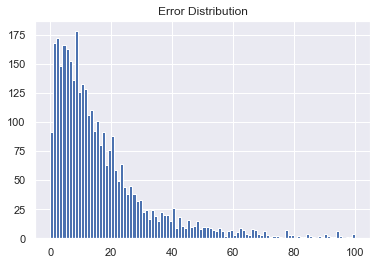

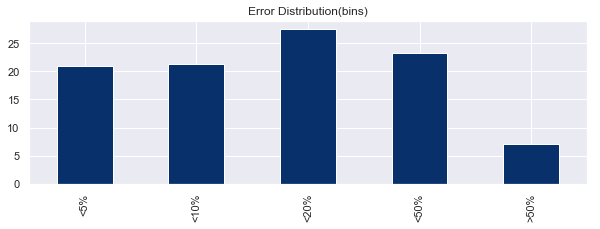

In [156]:
model=RandomForestRegressor(n_estimators=300,max_depth=40,max_features='sqrt',random_state=0)
scores3,test_data3,y_test3,y_preds3=trainKV(dataX,dataY,model)

X_test,y_test,y_pred=test_data3[-1],y_test3[-1],y_preds3[-1]
result_df=pd.DataFrame(X_test,columns=dataX.columns)
result_df['Actual']=y_test
result_df['Predicted']=y_pred
result_df['Error']=abs(y_test-y_pred)
result_df['Error%']=abs(y_test-y_pred)*100/y_test
result_df['Error%']=result_df['Error%'].apply(round)
result_df['ErrorClass']=result_df['Error%'].apply(errorClass)
result_df['Error%'].hist(bins=100,range=(0,100))
plt.title('Error Distribution')
plt.show()
p=result_df.ErrorClass.value_counts()[elist]*100/result_df.shape[0]
p.plot(kind='bar',colormap='Blues_r',figsize=(10,3))
plt.title('Error Distribution(bins)')
plt.show()

#p=result_df.groupby(['ErrorClass','IsActiveHour'],as_index=False)['T1'].count()
#p['perCent']=p['T1']*100/p['T1'].sum()
#sns.barplot(data=p,x='ErrorClass',y='perCent',hue='IsActiveHour')
#plt.show()

### Random Forest with feature crosses w/o hour

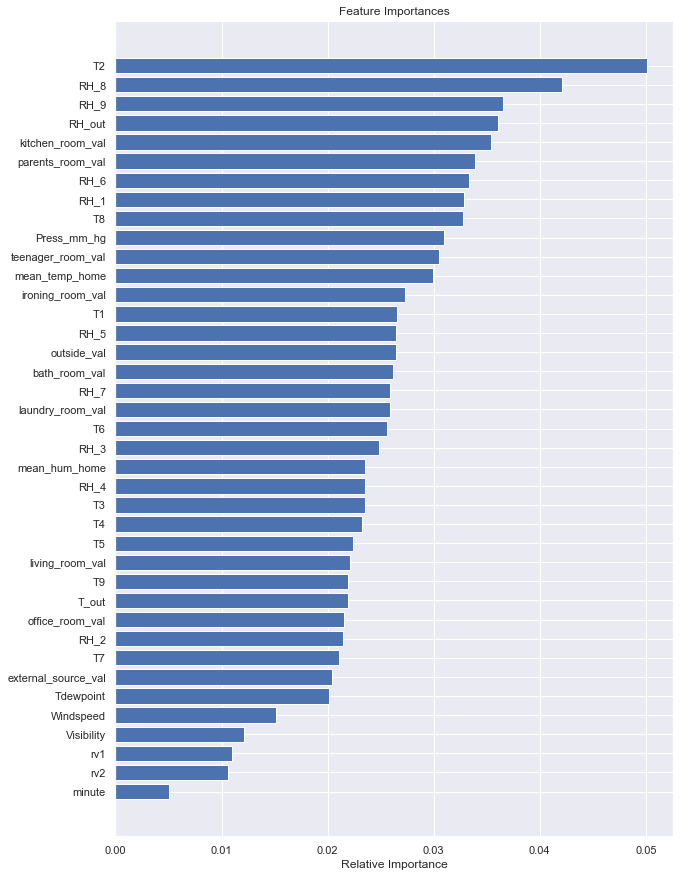

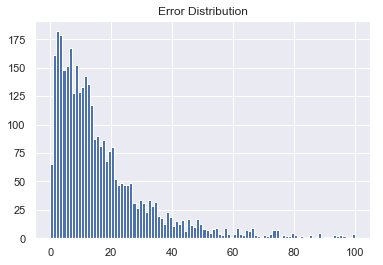

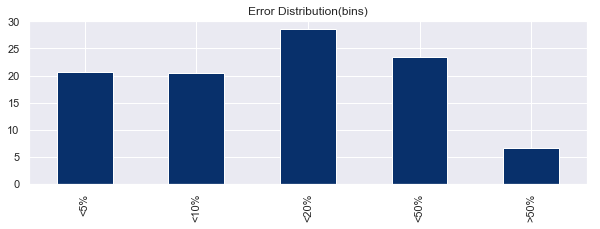

In [152]:
model=RandomForestRegressor(n_estimators=300,max_depth=40,max_features='sqrt',random_state=0)
scores4,test_data4,y_test4,y_preds4=trainKV(dataX.drop(['hour','IsActiveHour'],axis=1),dataY,model)

X_test,y_test,y_pred=test_data4[-1],y_test4[-1],y_preds4[-1]
result_df=pd.DataFrame(X_test,columns=dataX.columns)
result_df['Actual']=y_test
result_df['Predicted']=y_pred
result_df['Error']=abs(y_test-y_pred)
result_df['Error%']=abs(y_test-y_pred)*100/y_test
result_df['Error%']=result_df['Error%'].apply(round)
result_df['ErrorClass']=result_df['Error%'].apply(errorClass)
result_df['Error%'].hist(bins=100,range=(0,100))
plt.title('Error Distribution')
plt.show()
p=result_df.ErrorClass.value_counts()[elist]*100/result_df.shape[0]
p.plot(kind='bar',colormap='Blues_r',figsize=(10,3))
plt.title('Error Distribution(bins)')
plt.show()

#p=result_df.groupby(['ErrorClass','IsActiveHour'],as_index=False)['T1'].count()
#p['perCent']=p['T1']*100/p['T1'].sum()
#sns.barplot(data=p,x='ErrorClass',y='perCent',hue='IsActiveHour')
#plt.show()

### Grid Search CV

In [203]:
#rfc=RandomForestRegressor(random_state=42)
#from sklearn.model_selection import GridSearchCV
#param_grid = { 
#    'n_estimators': [200,400, 500],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [10,20,30,40]
#}
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

#x_train, x_test, y_train, y_test = train_test_split(dataX[dataX.columns[:26]], dataY, test_size=0.3, random_state=42)
#CV_rfc.fit(x_train, y_train)

#### Couldn't find best parameters as my system is very slow

## Observations and motivation for next steps

###### There are outliers in the Applications features, having them in model training messed up the model metrics i.e mean errors are more

###### Model is giving more importance to hours or Active hours ([6,7,8,9,10,17,18,19,20,21]). I have derived this features from data column. This goes well with the intuition , when people are around and awake they will switch on lights or run there appliances like TV,Wash Machines etc.. From my EDA as well, only hours data has some patterns w.r.t to energy consumptions. I couldn't find such patterns in any other feature

###### There are other features which model is giving importance like temperature in living room,kitchen room and teenage room. Useing energy efficient living room applications can reduct consumption

###### Model performance is not much varying with features used,didn't do much optimization in terms of parameters

## Model performance on test data

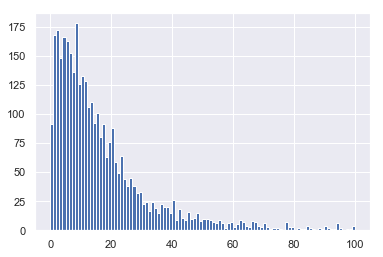

In [157]:
result_df['Error%'].hist(bins=100,range=(0,100))

## Build a business case for next steps 

### 1.Forecasting increase in energy production in coming years (Time Series)

#### Forecasting  energy consumption can help authorities to plan there energy production. It also helps to understand the energy consumption of people and to learn abnormal energy consumptions 

## References (add your references below)
[1] Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788,